# Importing a Table from Wikipedia and converting to a DataFrame

Firstly, import Pandas

In [ ]:
import pandas as pd

Then import Requests

In [ ]:
import requests

Install Beautiful Soup

In [ ]:
pip install beautifulsoup4

Then import Beautiful Soup

In [ ]:
from bs4 import BeautifulSoup

# Checking to see if we have permission to import the table

A 200 status code tells us that it's alright to access information from a certain website


In [5]:
wikiurl='https://en.wikipedia.org/wiki/Nigeria'
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


Importing the table using Beautiful Soup

In [11]:
soup=BeautifulSoup(response.text, 'html.parser')
population=soup.find('table', {'class': 'wikitable'})

Reading the url html and assigning it a name 'df2'

In [45]:
df2=pd.read_html(str(population))

Now, let's take a look at what the table looks like

In [46]:
df2

[  Population in Nigeria[169][170]                             \
                              Year Million Unnamed: 2_level_1   
 0                            1971      55                NaN   
 1                            1980      71                NaN   
 2                            1990      95                NaN   
 3                            2000     125                NaN   
 4                            2004     138                NaN   
 5                            2008     151                NaN   
 6                            2012     167                NaN   
 7                            2016     186                NaN   
 8                            2017     191                NaN   
 
                       
   Unnamed: 3_level_1  
 0                NaN  
 1                NaN  
 2                NaN  
 3                NaN  
 4                NaN  
 5                NaN  
 6                NaN  
 7                NaN  
 8                NaN  ]

# Converting the table to a Pandas DataFrame

In [47]:
df2=pd.DataFrame(df2[0])

Now, let's see what the table looks like after being converted to a dataframe

In [15]:
df2

Population in Nigeria[169][170]                             \
                             Year Million Unnamed: 2_level_1   
0                            1971      55                NaN   
1                            1980      71                NaN   
2                            1990      95                NaN   
3                            2000     125                NaN   
4                            2004     138                NaN   
5                            2008     151                NaN   
6                            2012     167                NaN   
7                            2016     186                NaN   
8                            2017     191                NaN   

                      
  Unnamed: 3_level_1  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
5                NaN  
6                NaN  
7                NaN  
8                NaN

# Converting the DataFrame from a multi level index to a single level

Due to importation from Wiki, we must convert it from a multi level index to a single level, so we can get rid of unwanted columns

In [48]:
df2.columns = ['_'.join(col) for col in df2.columns.values]

Let's take a new at what the single index table looks like

In [49]:
df2

,Population in Nigeria[169][170]_Year,Population in Nigeria[169][170]_Million,Population in Nigeria[169][170]_Unnamed: 2_level_1,Population in Nigeria[169][170]_Unnamed: 3_level_1
0,1971,55,NaN,NaN
1,1980,71,NaN,NaN
2,1990,95,NaN,NaN
3,2000,125,NaN,NaN
4,2004,138,NaN,NaN
5,2008,151,NaN,NaN
6,2012,167,NaN,NaN
7,2016,186,NaN,NaN
8,2017,191,NaN,NaN


# Dropping unwanted columns

Since we do not have need of the two last columns, let's drop them

In [50]:
df2 = df2.drop(['Population in Nigeria[169][170]_Unnamed: 3_level_1','Population in Nigeria[169][170]_Unnamed: 2_level_1'], axis=1)

Now, the DataFrame has just the two columns we need

In [51]:
df2

,Population in Nigeria[169][170]_Year,Population in Nigeria[169][170]_Million
0,1971,55
1,1980,71
2,1990,95
3,2000,125
4,2004,138
5,2008,151
6,2012,167
7,2016,186
8,2017,191


But we need to rename the columns to something understandable

In [54]:
df2.rename(columns = {
    'Population in Nigeria[169][170]_Year': 'Year', 'Population in Nigeria[169][170]_Million': 'Population(in millions)'},
          inplace= 'True')

Here we have the renamed columns

In [55]:
df2

,Year,Population(in millions)
0,1971,55
1,1980,71
2,1990,95
3,2000,125
4,2004,138
5,2008,151
6,2012,167
7,2016,186
8,2017,191


Finally, we have to make the 'Year' column as the index so we can easily plot a graph or plot

In [59]:
df2 = df2.set_index('Year')

The new DataFrame with the 'Year' column as index

In [62]:
df2

,Population(in millions)
Year,
1971,55
1980,71
1990,95
2000,125
2004,138
2008,151
2012,167
2016,186
2017,191


# Plotting the Chart

Now, let's plot a barchart using the DataFrame

<AxesSubplot:xlabel='Year'>

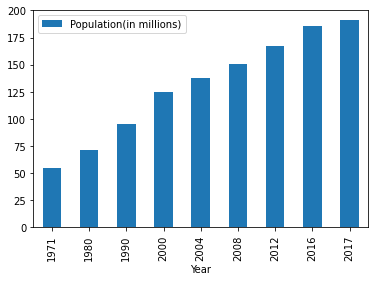

In [66]:
df2.plot.bar()

<AxesSubplot:xlabel='Year'>

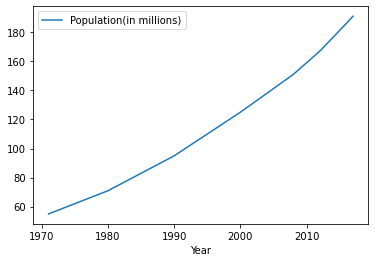

In [67]:
df2.plot()